[![alt-text](./img/LP-School-Of-AI-black.png)](https://www.facebook.com/groups/1204328906374103/)

# Introducción a Statistical Machine Learning
## Semana IV: Regresión Logística y funciones de activación 
por: [Marco Antonio Vino](https://www.linkedin.com/in/mavino)
### 4.1 Regresión Logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### ¿Qué tipo de dato es el que queremos predecir?

* Variables cualitativas
    * Variables cualitativas nominales
    * Variables cualitativas ordinales
* Variables cuantitativas
    * Variables cuantitativas discretas 
    * Variables cuantitativas continuas

In [2]:
HO = pd.read_excel("data/HomeOwernship.xls",index_col=0)
HO.head()

,Y,X
FAMILY,,
1,0,8
2,1,16
3,1,18
4,0,11
5,0,12


In [3]:
X = pd.DataFrame(HO["X"])
pd.DataFrame.insert(X,0,"X0",1)
X = X.as_matrix()
Y = HO["Y"].as_matrix()

In [4]:
def reglin(X,Y):
    return np.linalg.inv(X.T@X)@(X.T@Y)

In [5]:
Theta = reglin(X,Y)
h_x = X@Theta

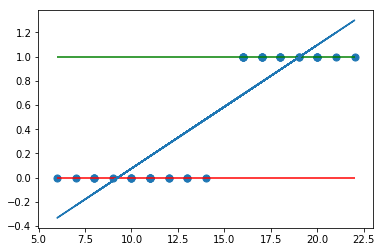

In [6]:
plt.hlines(1,6,22, colors="g")
plt.hlines(0,6,22, colors="r")
plt.scatter(HO["X"],HO["Y"], s=50)
plt.plot(HO["X"],h_x) ## Regresion Lineal 


Definiendo nuestra función de costo:
    $$ J(\Theta|X)  = - \frac{1}{n}\sum_{i=1}^{n} [y_i log(\hat{p_i}) + (1 - y_i)log(1 - \hat{p_i})]$$

### Construyendo la función de costo paso a paso 

Los datos observados con categorías 1 o 0:
$$ y_i$$

In [7]:
Y

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

El Logaritmo de la probabilidad de éxito

$$ log(\hat{p_i})$$
Para hallar ese valor sabemos que:
$$\hat{p_i} = \sigma(z_i)$$
Siendo $\sigma$ la función sigmoide, y $z_i$:

$$ z_i = \theta_0 + \theta_1x_{1i} + \theta_2x_{2i} + \theta_3x_{3i} + ...$$

$$z_i = \Theta X_i$$

In [8]:
print(X)
print(X.shape)

[[ 1  8]
 [ 1 16]
 [ 1 18]
 [ 1 11]
 [ 1 12]
 [ 1 19]
 [ 1 20]
 [ 1 13]
 [ 1  9]
 [ 1 10]
 [ 1 17]
 [ 1 18]
 [ 1 14]
 [ 1 20]
 [ 1  6]
 [ 1 19]
 [ 1 16]
 [ 1 10]
 [ 1  8]
 [ 1 18]
 [ 1 22]
 [ 1 16]
 [ 1 12]
 [ 1 11]
 [ 1 16]
 [ 1 11]
 [ 1 20]
 [ 1 18]
 [ 1 11]
 [ 1 10]
 [ 1 17]
 [ 1 13]
 [ 1 21]
 [ 1 20]
 [ 1 11]
 [ 1  8]
 [ 1 17]
 [ 1 16]
 [ 1  7]
 [ 1 17]]
(40, 2)


In [9]:
print(Theta)
print(Theta.shape)

[-0.94568607  0.10213098]
(2,)


In [10]:
Z = X@Theta
print(Z.shape)
Z

(40,)


array([-0.12863825,  0.68840956,  0.89267152,  0.17775468,  0.27988565,
        0.99480249,  1.09693347,  0.38201663, -0.02650728,  0.0756237 ,
        0.79054054,  0.89267152,  0.48414761,  1.09693347, -0.33290021,
        0.99480249,  0.68840956,  0.0756237 , -0.12863825,  0.89267152,
        1.30119543,  0.68840956,  0.27988565,  0.17775468,  0.68840956,
        0.17775468,  1.09693347,  0.89267152,  0.17775468,  0.0756237 ,
        0.79054054,  0.38201663,  1.19906445,  1.09693347,  0.17775468,
       -0.12863825,  0.79054054,  0.68840956, -0.23076923,  0.79054054])

Hallando el valor de probabilidad de la predicción:
$$\hat{p_i} = \sigma(z_i) = \frac{1}{1+e^{-z}}$$

In [11]:
def sigmoide(Z):
    return 1/(1+np.exp(-Z))

In [12]:
p_hat = sigmoide(Z)

In [13]:
p_hat

array([0.46788471, 0.66561303, 0.70944117, 0.54432203, 0.56951819,
       0.73003546, 0.74968509, 0.5943594 , 0.49337357, 0.51889692,
       0.68794738, 0.70944117, 0.61872679, 0.74968509, 0.41753513,
       0.73003546, 0.66561303, 0.51889692, 0.46788471, 0.70944117,
       0.7860361 , 0.66561303, 0.56951819, 0.54432203, 0.66561303,
       0.54432203, 0.74968509, 0.70944117, 0.54432203, 0.51889692,
       0.68794738, 0.5943594 , 0.76835831, 0.74968509, 0.54432203,
       0.46788471, 0.68794738, 0.66561303, 0.44256237, 0.68794738])

Aplicando el logaritmo :
$$ log(\hat{p_i})$$

In [14]:
lp_hat = np.log(p_hat)
lp_hat

array([-0.75953336, -0.40704681, -0.3432777 , -0.60821424, -0.56296456,
       -0.31466217, -0.28810204, -0.5202711 , -0.70648865, -0.65605003,
       -0.37404292, -0.3432777 , -0.48009147, -0.28810204, -0.8733866 ,
       -0.31466217, -0.40704681, -0.65605003, -0.75953336, -0.3432777 ,
       -0.24075256, -0.40704681, -0.56296456, -0.60821424, -0.40704681,
       -0.60821424, -0.28810204, -0.3432777 , -0.60821424, -0.65605003,
       -0.37404292, -0.5202711 , -0.2634991 , -0.28810204, -0.60821424,
       -0.75953336, -0.37404292, -0.40704681, -0.81517388, -0.37404292])

Calculando la Función de costo :
    $$ J(\Theta|X)  = - \frac{1}{n}\sum_{i=1}^{n} [y_i log(\hat{p_i}) + (1 - y_i)log(1 - \hat{p_i})]$$

Considerando esta primera parte 
$$ [y_i log(\hat{p_i}) + (1 - y_i)log(1 - \hat{p_i})]$$

In [15]:
i = Y*lp_hat + (1-Y)*np.log(1 - p_hat)
i

array([-0.6308951 , -0.40704681, -0.3432777 , -0.78596892, -0.84285021,
       -0.31466217, -0.28810204, -0.90228773, -0.67998137, -0.73167373,
       -0.37404292, -0.3432777 , -0.96423908, -0.28810204, -0.5404864 ,
       -0.31466217, -0.40704681, -0.73167373, -0.6308951 , -0.3432777 ,
       -0.24075256, -0.40704681, -0.84285021, -0.78596892, -0.40704681,
       -0.78596892, -0.28810204, -0.3432777 , -0.78596892, -0.73167373,
       -0.37404292, -0.90228773, -0.2634991 , -0.28810204, -0.78596892,
       -0.6308951 , -0.37404292, -0.40704681, -0.58440465, -0.37404292])

Aplicando la sumatoria y diviendo entre n

In [16]:
J = -np.sum(i)/i.shape[0]
J

0.5366859793353862

In [17]:
def costFunc(X,Y,Theta):
    return -np.sum( Y*np.log(sigmoide(X@Theta)) + (1-Y)*np.log(1-sigmoide(X@Theta)))/Y.shape[0]

In [18]:
costFunc(X,Y,Theta)

0.5366859793353862

Hallando el gradiente
$$\frac{\partial J}{\partial \theta_j} = \frac{1}{n}\sum_{i=1}^{n}[\hat{p_i} - y_i]x_{i}^{(j)}$$

In [19]:
(X.T@(sigmoide(X@Theta) - Y))/Y.shape[0]

array([ 0.09781833, -0.10462449])

In [20]:
def costFunc(X,Y,Theta):
    J =  -np.sum( Y*np.log(sigmoide(X@Theta)) + (1-Y)*np.log(1-sigmoide(X@Theta)))/Y.shape[0]
    J_grad = (X.T@(sigmoide(X@Theta) - Y))/Y.shape[0]
    return J, J_grad

### GRADIENT DESCENT

* Inicializamos los Parámetros de manera aleatoria
* Por el número de iteraciones definidas. 
    * Calculamos el valor del los gradientes
    * Actualizamos los parámetros


#### Inicializando los parámetros de manera aleatoria

In [21]:
np.random.seed(12345)
Theta = np.random.randn(X.shape[1])

Obtenemos el gradiente:

$$\frac{\partial J}{\partial \theta_j} = \frac{1}{n}\sum_{i=1}^{n}[\hat{p_i} - y_i]x_{i}^{(j)}$$

In [22]:
J , J_grad = costFunc(X,Y,Theta)

In [23]:
costFunc(X,Y,Theta)

(2.2447678622766625, array([0.46795735, 4.81571816]))

#### Regla de ACTUALIZACIÓN DE LOS PARÁMETROS

$$ \theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i}$$

In [24]:
def act_Theta(Theta,J_grad,alpha=0.001):
    return  Theta - alpha*J_grad

In [25]:
def gradientDescent(X,Y,Theta_gd,alpha=0.01,iteraciones=1000):
    histJ = []
    J , J_grad = costFunc(X,Y,Theta_gd)
    histJ.append(J)
    for i in range(1,iteraciones+1):
        Theta_gd = act_Theta(Theta_gd,J_grad,alpha=alpha)
        J , J_grad = costFunc(X,Y,Theta_gd)
        histJ.append(J)
        if i%500 ==0:
            print("Función de costo en la iteración ", i, ": ",round(J,6))
    return Theta_gd , histJ

In [26]:
Theta_opt , J_hist = gradientDescent(X,Y,Theta,iteraciones=10**4)

Función de costo en la iteración  500 :  0.552323
Función de costo en la iteración  1000 :  0.499957
Función de costo en la iteración  1500 :  0.456661
Función de costo en la iteración  2000 :  0.420554
Función de costo en la iteración  2500 :  0.390142
Función de costo en la iteración  3000 :  0.364267
Función de costo en la iteración  3500 :  0.34203
Función de costo en la iteración  4000 :  0.32274
Función de costo en la iteración  4500 :  0.305859
Función de costo en la iteración  5000 :  0.290967
Función de costo en la iteración  5500 :  0.277733
Función de costo en la iteración  6000 :  0.265893
Función de costo en la iteración  6500 :  0.255236
Función de costo en la iteración  7000 :  0.24559
Función de costo en la iteración  7500 :  0.236815
Función de costo en la iteración  8000 :  0.228795
Función de costo en la iteración  8500 :  0.221433
Función de costo en la iteración  9000 :  0.21465
Función de costo en la iteración  9500 :  0.208377
Función de costo en la iteración  10

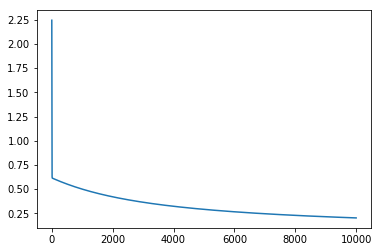

In [27]:
plt.plot(J_hist)

In [28]:
Theta_opt

array([-6.22742551,  0.45870685])

#### Aplicandola a nuestro modelo

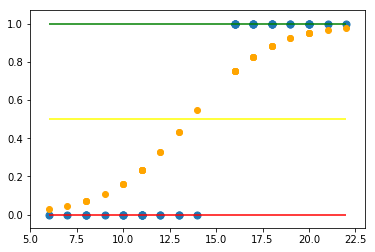

In [29]:
plt.hlines(1,6,22, colors="g")
plt.hlines(0,6,22, colors="r")
plt.hlines(0.5,6,22, colors="yellow")
plt.scatter(HO["X"],HO["Y"], s=50)
#plt.plot(HO["X"],h_x) ## Regresion Lineal 
plt.scatter(HO["X"],sigmoide(X@Theta_opt), c = "orange")

In [30]:
sigmoide(X@Theta_opt)

array([0.07190618, 0.75248021, 0.88383901, 0.23475563, 0.32674518,
       0.92329661, 0.95010784, 0.43432259, 0.10918785, 0.16241649,
       0.82786784, 0.88383901, 0.54846496, 0.95010784, 0.03002662,
       0.92329661, 0.75248021, 0.16241649, 0.07190618, 0.88383901,
       0.9794499 , 0.75248021, 0.32674518, 0.23475563, 0.75248021,
       0.23475563, 0.95010784, 0.88383901, 0.23475563, 0.16241649,
       0.82786784, 0.43432259, 0.96787345, 0.95010784, 0.23475563,
       0.07190618, 0.82786784, 0.75248021, 0.046687  , 0.82786784])

### Conteo de los casos de predicciones acertadas

In [31]:
def aciertos(X,Theta_opt,Y): 
    Salida = np.where(sigmoide(X@Theta_opt)>= 0.5, 1, 0)
    return Salida, np.sum(Y == Salida)/Y.shape[0]

In [32]:
Y_hat , count = aciertos(X,Theta_opt,Y)
count

0.975

In [33]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [34]:
Y_hat = np.where(sigmoide(X@Theta_opt)>=0.5,1,0)
Y_hat

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [35]:
Y

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [36]:
MC = confusion_matrix(Y,Y_hat)
MC

array([[18,  1],
       [ 0, 21]])

Confusion matrix, without normalization


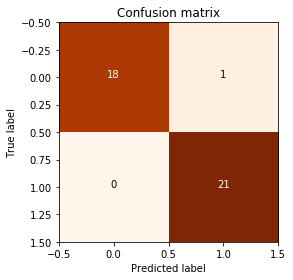

In [37]:
plot_confusion_matrix(MC)

### En base a esta herramienta podemos realizar el análisis de problemas más complejos 

In [38]:
from sklearn.linear_model import LogisticRegression
lrVivienda = LogisticRegression(random_state=0).fit(X, Y)

In [39]:
lrVivienda.predict(X) == Y_hat

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Confusion matrix, without normalization


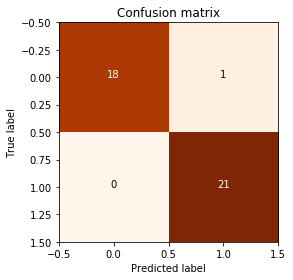

In [40]:
plot_confusion_matrix(confusion_matrix(Y,lrVivienda.predict(X)))

# Reconocimiento clasificador de imagenes binario  

Fuente de los datos: 
        ![alt-text](img/J6VS.png)

![alt-text](img/1.png)

![alt-text](img/s.png)

In [41]:
D = np.fromfile("data/digits",sep=",")

In [42]:
D = D.reshape((1000,400))

In [43]:
D[0]

array([255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 250., 228., 219., 219., 219., 219., 240., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 219.,
        59.,  26.,  49.,  49.,  29., 128., 239., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 247., 155.,  32., 166.,
       255., 255., 176.,  79., 150., 239., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 231.,  73., 121., 255., 255., 255.,
       255., 255., 114., 145., 240., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       209.,  50., 201., 254., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 25

420


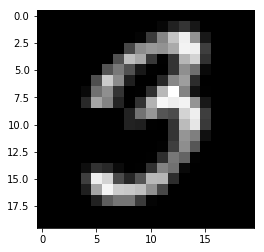

In [44]:
Numi = np.random.randint(0,500)
print(Numi)
plt.imshow(D[Numi].reshape((20,20)), cmap="binary")

925


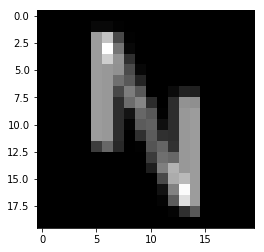

In [45]:
Ni = np.random.randint(500,1000)
print(Ni)
plt.imshow(D[Ni].reshape((20,20)), cmap="binary")

In [46]:
D1 = D/255

In [47]:
X = np.insert(D1,0,np.ones(D.shape[0]),axis=1)
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [48]:
Y = np.zeros(X.shape[0])
Y[500:] = 1 
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### GRADIENT DESCENT

* Inicializamos los Parámetros de manera aleatoria
* Por el número de iteraciones definidas. 
    * Calculamos el valor del los gradientes
    * Actualizamos los parámetros


In [49]:
Theta = np.random.choice(np.linspace(-0.001,0.001),401)

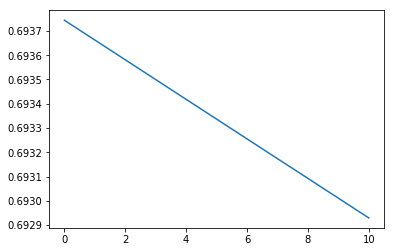

In [50]:
Theta_opt, J_hist = gradientDescent(X,Y,Theta,alpha=0.0001,iteraciones=10)

plt.plot(J_hist)

In [51]:
Y_hat , count = aciertos(X,Theta_opt,Y)
count 

0.421

Observacion #644
Salida Esperada: 1.0
Probabilidad: 0.499906586664067


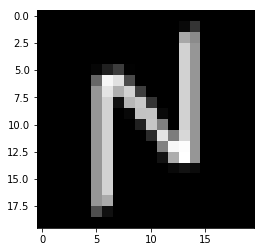

In [52]:
Ejem_i = np.random.randint(0,1000)
print("Observacion #" + str(Ejem_i))
print("Salida Esperada:", Y[Ejem_i])
print("Probabilidad:", sigmoide(np.insert(D1[Ejem_i],0,1)@Theta_opt))
plt.imshow(D1[Ejem_i].reshape((20,20)), cmap="binary",)
plt.show()

0.421
Normalized confusion matrix


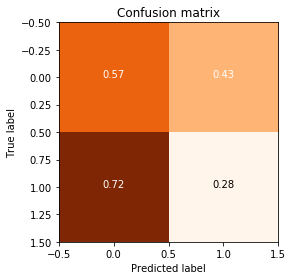

In [53]:
print(count)
plot_confusion_matrix(confusion_matrix(Y,Y_hat), True)

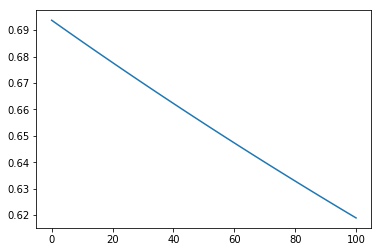

In [54]:
Theta_opt, J_hist = gradientDescent(X,Y,Theta,alpha=0.001,iteraciones=10**2)
plt.plot(J_hist)

In [55]:
Y_hat , count = aciertos(X,Theta_opt,Y)
count

1.0

Observacion #630
Salida Esperada: 1.0
Probabilidad: 0.5329419069254948


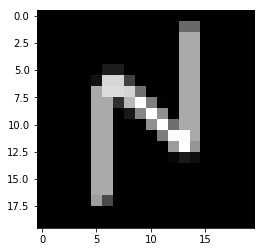

In [56]:
Ejem_i = np.random.randint(0,1000)
print("Observacion #" + str(Ejem_i))
print("Salida Esperada:", Y[Ejem_i])
print("Probabilidad:", sigmoide(np.insert(D1[Ejem_i],0,1)@Theta_opt))
plt.imshow(D1[Ejem_i].reshape((20,20)), cmap="binary",)
plt.show()

1.0
Normalized confusion matrix


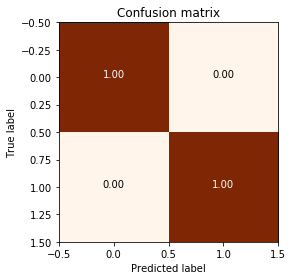

In [57]:
print(count)
plot_confusion_matrix(confusion_matrix(Y,Y_hat), True)

# ¿Qué pasa si mejoro mi entrenamiento?

Función de costo en la iteración  500 :  0.080083
Función de costo en la iteración  1000 :  0.042379


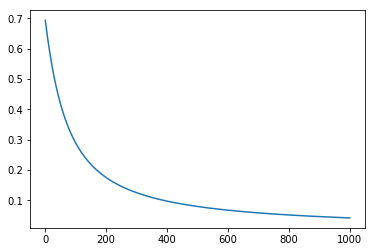

In [58]:
Theta_opt, J_hist = gradientDescent(X,Y,Theta,alpha=0.01,iteraciones=10**3)

plt.plot(J_hist)

1.0
Normalized confusion matrix


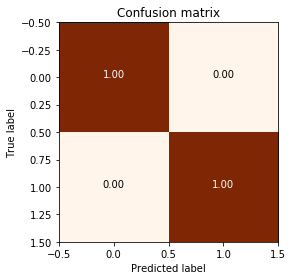

In [59]:
Y_hat , count = aciertos(X,Theta_opt,Y)
print(count)
plot_confusion_matrix(confusion_matrix(Y,Y_hat), True)

Observacion #608
Salida Esperada: 1.0
Probabilidad: 0.9702030686777376


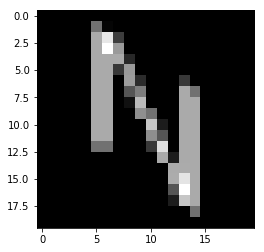

In [60]:
Ejem_i = np.random.randint(0,1000)
print("Observacion #" + str(Ejem_i))
print("Salida Esperada:", Y[Ejem_i])
print("Probabilidad:", sigmoide(np.insert(D1[Ejem_i],0,1)@Theta_opt))
plt.imshow(D1[Ejem_i].reshape((20,20)), cmap="binary",)
plt.show()

#### La "certeza" respecto a mis predicciones cambia

## ¿Qué pasa si introducimos otras letras?

In [61]:
np.fromfile("data/labels", dtype="<U1")

array(['3', 'N', 'D', '8', 'S', 'W', 'P', '7', 'K', 'J', '4', '2', 'Y',
       'H', 'A', 'G', 'Q', 'C', 'E', 'B', 'T', '5', 'U', 'V', 'I', 'X',
       '6', 'Z', 'F', 'R', 'M'], dtype='<U1')

In [62]:
All = np.fromfile("data/allABC", sep=",")

In [63]:
All = All.reshape((15500,400))

Observacion #8609
Probabilidad: 1.048770907361925e-89


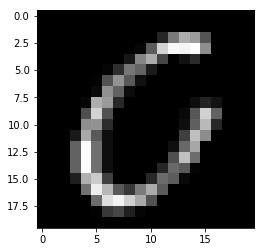

In [64]:
Ejem_i = np.random.randint(1000,15500)
print("Observacion #" + str(Ejem_i))
#print("Salida Esperada:", Y[Ejem_i])
print("Probabilidad:", sigmoide(np.insert(All[Ejem_i],0,1)@Theta_opt))
plt.imshow(All[Ejem_i].reshape((20,20)), cmap="binary",)
plt.show()

# Probabilidad de éxito y la de fracaso son complementarias, pero no debemos confundirlo con la exclusión.

# Caso multiclase

$$ \sigma(z^{(j)}) =  \frac{e^{z^{(j)}}}{\sum_{k=1}^{K} e^{z^{(k)}}} \hspace{2cm}  \forall j \in 1, 2, ... K$$

In [65]:
def softmax(Z_vec):
    """Compute the softmax of vector x."""
    exps = np.exp(Z_vec)
    return exps / np.sum(exps)

In [66]:
softmax([12,32])

array([2.06115362e-09, 9.99999998e-01])

$$ \sigma(z^{(j)}) =  \frac{e^{z^{(j)}+S}}{\sum_{k=1}^{K} e^{z^{(k)}+S}} \hspace{2cm}  \forall j \in 1, 2, ... K$$
Donde:
$$ S = - max(z^{(1)}, z{(2), ... ,z^{(K)}})$$

In [67]:
def stablesoftmax(Z_vec):
    shiftx = Z_vec - np.max(Z_vec)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)

In [68]:
stablesoftmax([1000,2000])

array([0., 1.])

In [69]:
Y2 = np.zeros(1500)
Y2[500:1000] = 1
Y2[1000:]=2

In [70]:
X2 = All[:1500].copy()

## Utilizando la librería caso multiclase (3)

In [71]:
lrMulti = LogisticRegression( solver='lbfgs',
                         multi_class='multinomial').fit(X2, Y2)

In [72]:
lrMulti.score(X2,Y2)

1.0

In [73]:
lrMulti.predict_proba(X2)[0]

array([9.99999852e-01, 2.29354327e-08, 1.25460840e-07])

In [74]:
np.sum(lrMulti.predict_proba(X2)[0])

1.0

Confusion matrix, without normalization


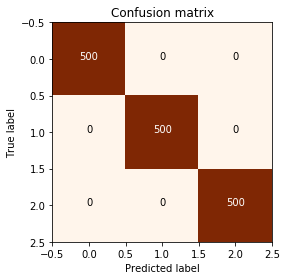

In [75]:
plot_confusion_matrix(confusion_matrix(Y2,lrMulti.predict(X2)))

In [76]:
Test = All[0:3]
Test.shape
#lrMulti.predict(Test)

(3, 400)

Probabilidad: [4.26548224e-08 1.41732289e-07 9.99999816e-01]
Probabilidad: [9.99999973e-01 2.14498321e-09 2.50781929e-08]
Probabilidad: [1.71446212e-12 9.99999996e-01 4.01957708e-09]
Probabilidad: [6.54768043e-09 7.05430464e-08 9.99999923e-01]
Probabilidad: [3.31891758e-12 9.99999982e-01 1.79370759e-08]
Probabilidad: [5.99787574e-08 9.99999887e-01 5.30303206e-08]
Probabilidad: [9.99999494e-01 1.29310962e-07 3.77162826e-07]
Probabilidad: [3.09271276e-08 9.99999889e-01 7.99188719e-08]
Calisifación [2. 0. 1. 2. 1. 1. 0. 1.]


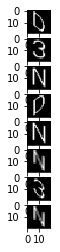

In [77]:
Test = All[[np.random.choice(np.arange(0,1500),8)] ]
[ print("Probabilidad:",i) for i in  lrMulti.predict_proba(Test)]
print("Calisifación",  lrMulti.predict(Test))
fig, ax = plt.subplots(8)
for axi , i in zip(ax,range(8)):
    axi.imshow(Test[i].reshape((20,20)), cmap="binary",)
plt.show()

# Multiclase All

In [78]:
labels = np.fromfile("data/labels", dtype="<U1")
Y3=np.zeros(All.shape[0])
for i in range(len(labels)):
    Y3[i*500:(i+1)*500] = i
Y3 = np.asanyarray(Y3)

In [79]:
lrAll = LogisticRegression( solver='lbfgs',
                         multi_class='multinomial').fit(All, Y3)

4 [9.90651904e-22 1.70451793e-29 4.38862200e-31 1.45711395e-21]
N [1.70849116e-23 9.99999896e-01 4.11502070e-18 6.27397152e-18]
Y [9.51117389e-23 1.71224401e-27 3.83505024e-27 1.89496761e-22]
X [8.54555277e-21 3.47145363e-14 9.71453319e-31 4.98334557e-21]


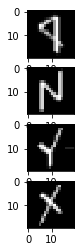

In [80]:
Test = All[[np.random.choice(np.arange(0,15500),4)] ]
Pred =   lrAll.predict(Test)
[print(labels[int(i)], p[:4]) for i,p in zip(Pred,lrAll.predict_proba(Test))]
fig, ax = plt.subplots(4)
for axi , i in zip(ax,range(4)):
    axi.imshow(Test[i].reshape((20,20)), cmap="binary",)
plt.show()

In [81]:
lrAll.score(All,Y3)

1.0

In [82]:
confusion_matrix(Y3, lrAll.predict(All))

array([[500,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0, 500,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0, 500,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 500,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 500,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,

[![alt-text](./img/cdd-lp-gray.png)](https://www.facebook.com/ccd.bolivia.bo/)